<a href="https://colab.research.google.com/github/jafetimbre/ms-school-stuff/blob/master/inteligent-systems/edge_detection/edge_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
from urllib.request import urlopen
import numpy as np
from google.colab.patches import cv2_imshow

Se citeste imaginea tinta si se afiseaza.

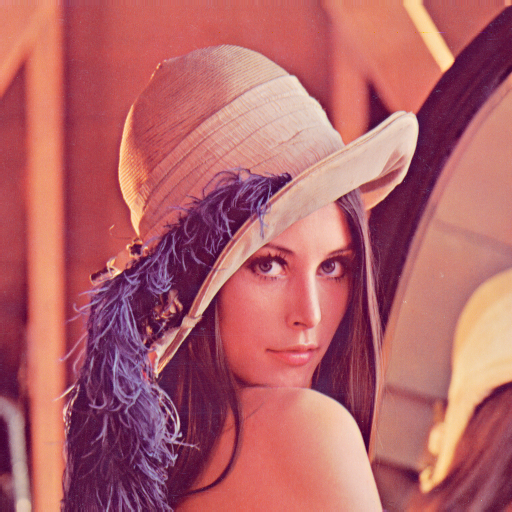

In [2]:
req = urlopen("https://raw.githubusercontent.com/jafetimbre/ms-school-stuff/master/inteligent-systems/edge_detection/res/lena.png")
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1)
cv2_imshow(img)

Se aplica un blur gausian pentru a elimina zgomotul din imagine. Astfel vor rezulta margini mai omogene.

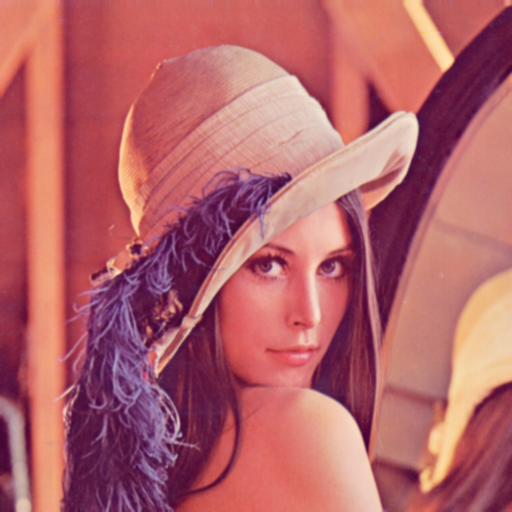

In [3]:
img_blur = cv2.GaussianBlur(img, (3, 3), sigmaX=0, sigmaY=0)
cv2_imshow(img_blur)

## Aplicarea detectiei prin metoda Sobel

Prima data o sa aplicam metoda de detectie Sobel, care este este cea mai des folosita metoda pentru aceasta problema.
Acesta functioneaza prin detectarea unor schimbari bruste al intensitatii pixelilor.
Se vor calcula separat cate un kernel pentru directiile orizontale si verticale separat, dupa care se vor imbina.

Aplicarea unui kernel peste dimensiunea X a imaginii:


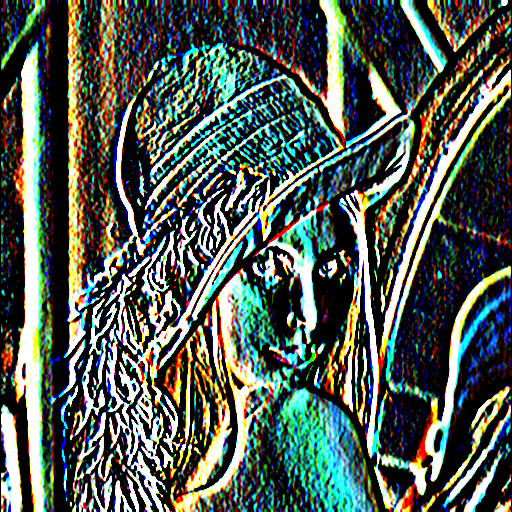

In [4]:
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
cv2_imshow(sobelx)

Aplicarea unui kernel peste dimensiunea Y a imaginii:

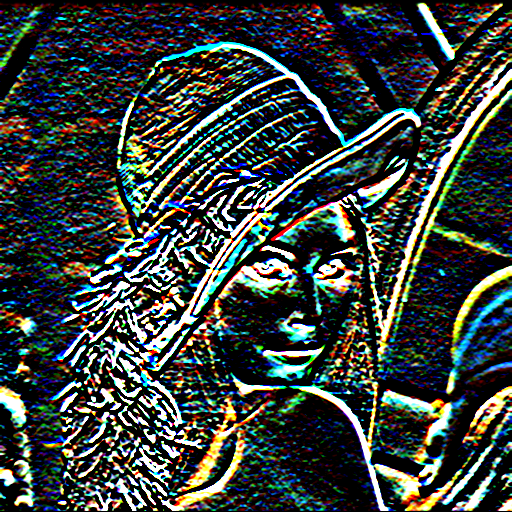

In [5]:
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
cv2_imshow(sobely)

Combinarea celor doua rezultate sau aplicarea ambelor:

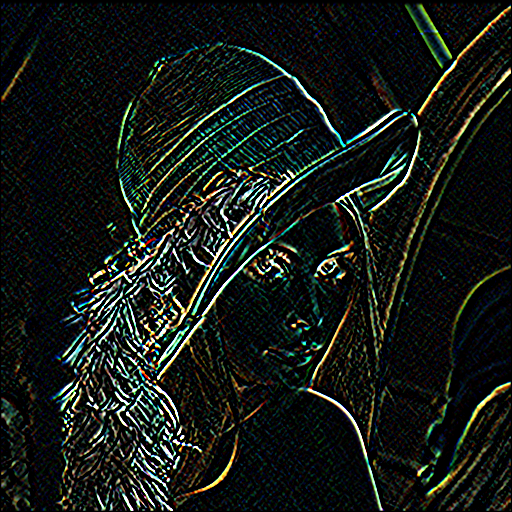

In [6]:
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
cv2_imshow(sobelxy)

## Aplicarea detectiei prin metoda Canny
Aceasta metoda este des folosita pentru a este una foare flexibila si robusta. Metoda urmareste 3 stagii prin care se extrag marginile dintr-o imagine, 4 impreuna cu aplicarea blur-ului gaussian:

1. Aplicarea blur-ului gaussian pentru reducerea zgomotului
2. Calcularea intensitatii gradientului din imagine
3. Eliminarea marginilor false
4. Aplicarea unui prag de histerezis



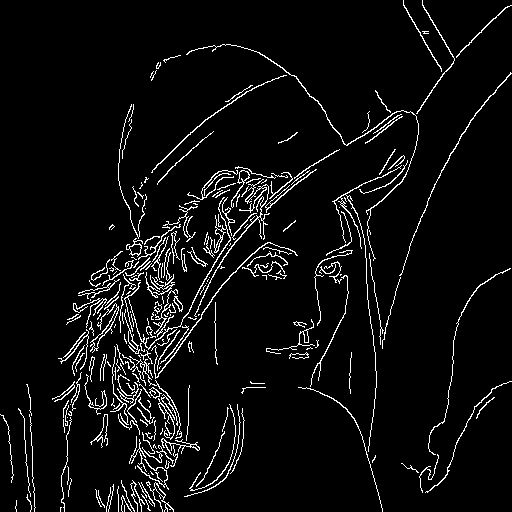

In [7]:
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200)

cv2_imshow(edges)
